The following code was implemented to clean the datasets obtained from the United States Geological Survey (USGS) National Produced Waters Database v2.3: https://energy.usgs.gov/EnvironmentalAspects/EnvironmentalAspectsofEnergyProductionandUse/ProducedWaters.aspx#3822349-data 

The major steps taken are to analyze and visualize the produced water data from the Texas well set. 

First the major libraries are imported, and the file read into a Pandas dataframe, df.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file = 'Texas Wells.xlsx'
df = pd.read_excel(file)

To fill in some of the missing data, I created two similar functions, as follows. In essence, the functions capture a list of rows with the missing attribute, and then search for their API numbers. A smaller dataframe with similar API numbers is then created. The first function fills in the missing latitudes and longitudes by copying these data from the rows where it is given. The second function fills in the missing upper depth and lower depth values by taking the average of the rows where it is given. The return values are the total number of data points that have been changed. 

Next, to analyze the data contained within this huge dataset, one can use the .info() and .head() method.

In [22]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19388 entries, 0 to 19387
Columns: 190 entries, IDUSGS to cull_chargeb
dtypes: float64(104), int64(2), object(84)
memory usage: 28.1+ MB


,IDUSGS,IDORIG,IDDB,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LATLONGAPX,API,USGSREGION,...,Sr87Sr86,I129,Rn222,Ra226,Ra228,cull_PH,cull_MgCa,cull_KCl,cull_K5Na,cull_chargeb
0,177,14-TX-01B,PERMIANENGLE,"Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...","Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...",31.90,-101.44,Latitude and Longitude are approximate.,NaN,West Texas and Eastern New Mexico,...,0.71744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,178,14-TX-02B,PERMIANENGLE,"Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...","Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...",31.91,-101.44,Latitude and Longitude are approximate.,NaN,West Texas and Eastern New Mexico,...,0.70920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,179,14-TX-03B,PERMIANENGLE,"Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...","Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...",31.86,-101.47,Latitude and Longitude are approximate.,NaN,West Texas and Eastern New Mexico,...,0.70891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,180,14-TX-04B,PERMIANENGLE,"Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...","Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...",31.99,-101.49,Latitude and Longitude are approximate.,NaN,West Texas and Eastern New Mexico,...,0.70912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
4,181,14-TX-05B,PERMIANENGLE,"Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...","Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...",31.98,-101.49,Latitude and Longitude are approximate.,NaN,West Texas and Eastern New Mexico,...,0.71780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since there are 190 columns and 19388 entries, some data cleaning needs to be implemented. There are multiple columns in the dataset that are empty, and so the first step is to remove them, and add them to a new dataframe, df_drop. 

In [145]:
# deleting columns that are null values
df_drop = df.dropna(axis= 1, how='all')

print(df.info())
print(df_drop.info())

# number of attributes dropped to 129 from 190

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19388 entries, 0 to 19387
Columns: 190 entries, IDUSGS to cull_chargeb
dtypes: float64(104), int64(2), object(84)
memory usage: 28.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19388 entries, 0 to 19387
Columns: 129 entries, IDUSGS to cull_chargeb
dtypes: float64(43), int64(2), object(84)
memory usage: 19.1+ MB
None


I then cleaned up the data by focusing only on the main parameters of interest, i.e. 'LATITUDE', 'LONGITUDE', 'API', 'USREGION', 'BASIN', 'COUNTY', 'WELLNAME', 'WELLTYPE', 'DATECOMP', 'DATESAMPLE', 'FORMATION', 'PERIOD', 'DEPTHUPPER', 'DEPTHLOWER', 'DEPTHWELL', 'SPGRAV', 'PH', 'TDSUSGS', 'HCO3', 'Ca', 'Cl', 'KNa', 'Mg', 'Na', 'SO4', 'H2S', 'cull_chargeb'. 

In [146]:
# selecting known wells with API numbers
df_drop = df_drop[['LATITUDE','LONGITUDE','API','BASIN','COUNTY','WELLNAME','WELLTYPE','DATECOMP','DATESAMPLE','FORMATION','PERIOD','DEPTHUPPER','DEPTHLOWER','DEPTHWELL','SPGRAV','PH','TDSUSGS','HCO3','Ca','Cl','KNa','Mg','Na','SO4','H2S','cull_chargeb']]      
df_drop.head()

,LATITUDE,LONGITUDE,API,BASIN,COUNTY,WELLNAME,WELLTYPE,DATECOMP,DATESAMPLE,FORMATION,...,TDSUSGS,HCO3,Ca,Cl,KNa,Mg,Na,SO4,H2S,cull_chargeb
0,31.90,-101.44,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaN,2014-01-23,Fusselman,...,69000.0,NaN,2190,39800,NaN,403,22200,1580,NaN,NaN
1,31.91,-101.44,NaN,Permian,Glasscock,NaN,Tight Oil,NaN,2014-01-23,Cline Shale,...,79900.0,NaN,2450,46300,NaN,329,25200,351,NaN,NaN
2,31.86,-101.47,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaN,2014-01-23,Wolfwood (Wolfcamp/Woodford),...,127000.0,NaN,8010,75100,NaN,1130,36800,304,NaN,NaN
3,31.99,-101.49,NaN,Permian,Glasscock,NaN,Tight Oil,NaN,2014-01-23,Cline Shale,...,37700.0,NaN,572,13400,NaN,78.2,12900,<300,NaN,X
4,31.98,-101.49,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaN,2014-01-23,Fusselman,...,72400.0,NaN,2470,40900,NaN,474,22700,1530,NaN,NaN


Thus the final number of parameters fell down to 26. I also converted dates to datetime format. 

In [147]:
# converting dates to datetime
df_drop.DATECOMP = pd.to_datetime(df_drop.DATECOMP)
df_drop.DATESAMPLE = pd.to_datetime(df_drop.DATESAMPLE)

print(df_drop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19388 entries, 0 to 19387
Data columns (total 26 columns):
LATITUDE        16631 non-null float64
LONGITUDE       16635 non-null float64
API             8208 non-null float64
BASIN           19388 non-null object
COUNTY          19317 non-null object
WELLNAME        19087 non-null object
WELLTYPE        19388 non-null object
DATECOMP        1648 non-null datetime64[ns]
DATESAMPLE      16734 non-null datetime64[ns]
FORMATION       19388 non-null object
PERIOD          19388 non-null object
DEPTHUPPER      13614 non-null float64
DEPTHLOWER      11050 non-null float64
DEPTHWELL       9276 non-null float64
SPGRAV          16943 non-null object
PH              16406 non-null object
TDSUSGS         19373 non-null float64
HCO3            18664 non-null object
Ca              19366 non-null object
Cl              19375 non-null object
KNa             2345 non-null object
Mg              19358 non-null object
Na              17037 non-null objec

In [148]:
#Analyzing the lat and long data
print('Null values for the Latitude: ' + str(df_drop.LATITUDE.isnull().sum()))
print('Null values for the Longitude: ' + str(df_drop.LONGITUDE.isnull().sum()))

Null values for the Latitude: 2757
Null values for the Longitude: 2753


In [149]:
#Dropped the empty lat/lon values
df_drop = df_drop[df_drop.LATITUDE.notnull()]
df_drop = df_drop[df_drop.LONGITUDE.notnull()]
df_drop.head()

,LATITUDE,LONGITUDE,API,BASIN,COUNTY,WELLNAME,WELLTYPE,DATECOMP,DATESAMPLE,FORMATION,...,TDSUSGS,HCO3,Ca,Cl,KNa,Mg,Na,SO4,H2S,cull_chargeb
0,31.90,-101.44,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaT,2014-01-23,Fusselman,...,69000.0,NaN,2190,39800,NaN,403,22200,1580,NaN,NaN
1,31.91,-101.44,NaN,Permian,Glasscock,NaN,Tight Oil,NaT,2014-01-23,Cline Shale,...,79900.0,NaN,2450,46300,NaN,329,25200,351,NaN,NaN
2,31.86,-101.47,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaT,2014-01-23,Wolfwood (Wolfcamp/Woodford),...,127000.0,NaN,8010,75100,NaN,1130,36800,304,NaN,NaN
3,31.99,-101.49,NaN,Permian,Glasscock,NaN,Tight Oil,NaT,2014-01-23,Cline Shale,...,37700.0,NaN,572,13400,NaN,78.2,12900,<300,NaN,X
4,31.98,-101.49,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaT,2014-01-23,Fusselman,...,72400.0,NaN,2470,40900,NaN,474,22700,1530,NaN,NaN


In [150]:
df_drop_c = df_drop

In [142]:
column = 'DEPTHUPPER'
col_missing = df_drop[df_drop[column].isnull()].reset_index() 
slices_last = pd.DataFrame()

for i in range(500):         #len(col_missing
    
    slices = df_drop[df_drop.LATITUDE.isin([col_missing.LATITUDE[i]]) & df_drop.LONGITUDE.isin([col_missing.LONGITUDE[i]])]
    slices = slices.sort_values(by=[column]).reset_index()
    if i == 0:
        #initializing value of slices_last 
        slices_last = slices
        
    if slices.LATITUDE[0] != slices_last.LATITUDE[0] and len(slices) != 1:
        #to make sure that repeats are not found, and that the unique (single) wells are not returned
        
        print('index: ' + str(i), slices[['index','LATITUDE','LONGITUDE','WELLNAME','DEPTHUPPER','DEPTHLOWER']])
        
        if pd.notnull(slices[column]).any(): 
        
            mean = slices[column].mean() 
            
            #if the block of wells with this particular lat/long have any of depths
            #filled in, then fill the NaNs with the means of those depths
            
            if np.std(slices[column]) <= 400:
                #Check for not naming different levels of the well section accidentally, and be restricted to 
                #one formation only
                
                slices[column].fillna(mean, inplace=True)
                inds = slices['index']
                df_drop_c.loc[inds,column] = df_drop_c.loc[inds,column].fillna(mean, inplace=True)
                print('index: ' + str(i), slices[['index','LATITUDE','LONGITUDE','WELLNAME','DEPTHUPPER','DEPTHLOWER']])
            
    slices_last = slices

index: 3    index  LATITUDE  LONGITUDE WELLNAME  DEPTHUPPER  DEPTHLOWER
0     20     31.98    -102.39      NaN         NaN         NaN
1     21     31.98    -102.39      NaN         NaN         NaN
index: 8    index  LATITUDE  LONGITUDE WELLNAME  DEPTHUPPER  DEPTHLOWER
0     31     31.26    -101.06      NaN      6470.0         NaN
1     32     31.26    -101.06      NaN         NaN         NaN
2     33     31.26    -101.06      NaN         NaN         NaN
index: 8    index  LATITUDE  LONGITUDE WELLNAME  DEPTHUPPER  DEPTHLOWER
0     31     31.26    -101.06      NaN      6470.0         NaN
1     32     31.26    -101.06      NaN      6470.0         NaN
2     33     31.26    -101.06      NaN      6470.0         NaN
index: 16    index  LATITUDE  LONGITUDE                 WELLNAME  DEPTHUPPER  DEPTHLOWER
0    661   32.0631  -100.6965         W. I. Tubbs B-#1      6359.0         NaN
1    662   32.0631  -100.6965                  Jru 1-q      6359.0      6486.0
2    660   32.0631  -100.6965  W.

index: 77    index  LATITUDE  LONGITUDE            WELLNAME  DEPTHUPPER  DEPTHLOWER
0    851   32.5133  -100.5005     E.e. Harkins #1      5984.0      5994.0
1    852   32.5133  -100.5005  E.e. Harkins No. 1         NaN         NaN
index: 77    index  LATITUDE  LONGITUDE            WELLNAME  DEPTHUPPER  DEPTHLOWER
0    851   32.5133  -100.5005     E.e. Harkins #1      5984.0      5994.0
1    852   32.5133  -100.5005  E.e. Harkins No. 1      5984.0         NaN
index: 81    index  LATITUDE  LONGITUDE       WELLNAME  DEPTHUPPER  DEPTHLOWER
0    907   32.5529  -102.7319  Wl Hawkins #1         NaN         NaN
1    908   32.5529  -102.7319  Wl Hawkins #1         NaN         NaN
index: 83    index  LATITUDE  LONGITUDE           WELLNAME  DEPTHUPPER  DEPTHLOWER
0    923    33.385  -101.3963  Phillip Thomas #1      7985.0      8050.0
1    922    33.385  -101.3963  Phillip Thomas #1         NaN         NaN
index: 83    index  LATITUDE  LONGITUDE           WELLNAME  DEPTHUPPER  DEPTHLOWER
0    92

1   1221   31.9166  -102.4872  J.l. Johnson F #1      4082.0         NaN
index: 139    index  LATITUDE  LONGITUDE       WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1223   31.9609  -102.7688  Williamson #1      5414.0      5498.0
1   1226   31.9609  -102.7688  Williamson #1      7935.0      8035.0
2   1224   31.9609  -102.7688  Williamson #1         NaN         NaN
3   1225   31.9609  -102.7688  Williamson #1         NaN         NaN
4   1227   31.9609  -102.7688  Williamson #1         NaN         NaN
index: 153    index  LATITUDE  LONGITUDE          WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1259    31.411  -102.9317  W.d. Johnson #16         NaN         NaN
1   1260    31.411  -102.9317  W.d. Johnson #16         NaN         NaN
2   1261    31.411  -102.9317  W.d. Johnson #16         NaN         NaN
3   1262    31.411  -102.9317  W.d. Johnson #16         NaN         NaN
4   1263    31.411  -102.9317  W.d. Johnson #16         NaN         NaN
5   1264    31.411  -102.9317  W.d. Johnson #16         NaN

index: 206    index  LATITUDE  LONGITUDE       WELLNAME   DEPTHUPPER  DEPTHLOWER
0   1441   32.9411  -100.2223       Young #5  3748.000000      3757.0
1   1438   32.9411  -100.2223  J.b. Young #3  3750.000000      3752.0
2   1439   32.9411  -100.2223     J.b. Young  3750.000000      3752.0
3   1440   32.9411  -100.2223  J.b. Young #5  3749.333333         NaN
4   1442   32.9411  -100.2223  J.b. Young #5  3749.333333         NaN
5   1443   32.9411  -100.2223  J.b. Young #5  3749.333333         NaN
6   2128   32.9411  -100.2223       Young #5  3749.333333         NaN
index: 209    index  LATITUDE  LONGITUDE    WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1445   31.7143  -101.7489  Lane 37 #3      6514.0      6526.0
1   1446   31.7143  -101.7489  Lane 37 #3      6514.0      6526.0
2   1444   31.7143  -101.7489  Lane 37 #3         NaN         NaN
index: 209    index  LATITUDE  LONGITUDE    WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1445   31.7143  -101.7489  Lane 37 #3      6514.0      6526.0
1   1446   

index: 277    index  LATITUDE  LONGITUDE           WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1574   31.3986  -102.9247   W.d. Johnson #21      2250.0      2525.0
1   1572   31.3986  -102.9247  W. D. Johnson #21      2250.0         NaN
2   1573   31.3986  -102.9247  W. D. Johnson #21      2250.0         NaN
3   1575   31.3986  -102.9247   W.d. Johnson #21      2250.0         NaN
4   1576   31.3986  -102.9247  W. D. Johnson #21      2250.0         NaN
5   1577   31.3986  -102.9247  W. D. Johnson #21      2250.0         NaN
6   1578   31.3986  -102.9247  W. D. Johnson #21      2250.0         NaN
index: 283    index  LATITUDE  LONGITUDE           WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1579   31.4083  -102.9345  W. D. Johnson #18         NaN         NaN
1   1580   31.4083  -102.9345   W.d. Johnson #18         NaN         NaN
2   1581   31.4083  -102.9345   W.d. Johnson #18         NaN         NaN
3   1582   31.4083  -102.9345   W.d. Johnson #18         NaN         NaN
4   1583   31.4083  -102.9345

index: 345    index  LATITUDE  LONGITUDE          WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1796   32.0814  -101.4597    H. Phillips #3      2077.0      2083.0
1  14058   32.0814  -101.4597     H Phillips #3      2077.0      2300.0
2   1797   32.0814  -101.4597    H. Phillips #2      2077.0         NaN
3   1798   32.0814  -101.4597  Hart Phillips #3      2077.0         NaN
4   1799   32.0814  -101.4597    H. Phillips #3      2077.0         NaN
index: 349     index  LATITUDE  LONGITUDE               WELLNAME  DEPTHUPPER  DEPTHLOWER
0    1803   31.9055  -103.1517    Lum Daugherty No. 8      2750.0         NaN
1    1805   31.9055  -103.1517       Lum Daugherty #8      2750.0         NaN
2    1806   31.9055  -103.1517       Lum Daugherty #8      2750.0         NaN
3    1808   31.9055  -103.1517       Lum Daugherty #8      2750.0         NaN
4    1809   31.9055  -103.1517        L. Daugherty #8      2750.0         NaN
5    1810   31.9055  -103.1517       Lum Daugherty #8      2750.0         NaN


index: 363    index  LATITUDE  LONGITUDE        WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1874   33.1402  -100.7421  B. Wallace F-1      6724.0      6730.0
1  17051   33.1402  -100.7421   B Wallace F-1      6724.0      6730.0
2   1873   33.1402  -100.7421  B. Wallace F-1      6725.0      6763.0
3   1872   33.1402  -100.7421  B. Wallace F-1      7340.0      7421.0
4   1871   33.1402  -100.7421  B. Wallace F-1         NaN         NaN
index: 363    index  LATITUDE  LONGITUDE        WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1874   33.1402  -100.7421  B. Wallace F-1     6724.00      6730.0
1  17051   33.1402  -100.7421   B Wallace F-1     6724.00      6730.0
2   1873   33.1402  -100.7421  B. Wallace F-1     6725.00      6763.0
3   1872   33.1402  -100.7421  B. Wallace F-1     7340.00      7421.0
4   1871   33.1402  -100.7421  B. Wallace F-1     6878.25         NaN
index: 364    index  LATITUDE  LONGITUDE                 WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1875   31.2267  -102.8473    Blackmon & Scha

index: 412    index  LATITUDE  LONGITUDE   WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1944   31.9918  -102.6836          7      4165.0         NaN
1   1943   31.9918  -102.6836  Cowden #7         NaN         NaN
index: 412    index  LATITUDE  LONGITUDE   WELLNAME  DEPTHUPPER  DEPTHLOWER
0   1944   31.9918  -102.6836          7      4165.0         NaN
1   1943   31.9918  -102.6836  Cowden #7      4165.0         NaN
index: 413     index  LATITUDE  LONGITUDE            WELLNAME  DEPTHUPPER  DEPTHLOWER
0    1958   31.4546  -102.4614                   1      8600.0      8635.0
1    1959   31.4546  -102.4614        Block 31 L-1      8655.0      8928.0
2    1954   31.4546  -102.4614                L #1      8820.0      8950.0
3    1955   31.4546  -102.4614                L #1      8820.0      8950.0
4    1961   31.4546  -102.4614  Block 31 Unit L #1      8820.0      8928.0
5    1962   31.4546  -102.4614        Blk. 31 L #1      8820.0      9095.0
6    1963   31.4546  -102.4614                R #1  

index: 456    index  LATITUDE  LONGITUDE WELLNAME  DEPTHUPPER  DEPTHLOWER
0   2337   32.1266   -102.697        1         NaN         NaN
1   2338   32.1266   -102.697        1         NaN         NaN
index: 458    index  LATITUDE  LONGITUDE WELLNAME  DEPTHUPPER  DEPTHLOWER
0   2339   32.1246  -102.7051        9         NaN         NaN
1   2340   32.1246  -102.7051        9         NaN         NaN
index: 461    index  LATITUDE  LONGITUDE WELLNAME  DEPTHUPPER  DEPTHLOWER
0   2342   32.1336  -102.6993       37         NaN         NaN
1   2343   32.1336  -102.6993       37         NaN         NaN
index: 464    index  LATITUDE  LONGITUDE WELLNAME  DEPTHUPPER  DEPTHLOWER
0   2345   32.4008  -102.3899        1         NaN         NaN
1   2346   32.4008  -102.3899        1         NaN         NaN
2   2347   32.4008  -102.3899        1         NaN         NaN
index: 469    index  LATITUDE  LONGITUDE WELLNAME  DEPTHUPPER  DEPTHLOWER
0   2350   32.1207  -102.7211       39         NaN         NaN


In [151]:
df_drop.DEPTHUPPER.isnull().sum()

4946

In [65]:
a = fill_values_with_API('LATITUDE')         #2 data points were changed
print(a)

b = fill_values_with_API('LONGITUDE')        #1 data point was changed
print(b)

2
1


Next I filled in the missing depths using fill_DEPTH_with_API() function.

In [70]:
c = fill_DEPTH_with_API('DEPTHUPPER')          #704 DEPTHUPPER filled
print(c)

704


In [71]:
d = fill_DEPTH_with_API('DEPTHLOWER')          #917 DEPTHLOWER filled
print(d)

917


Using this initial data, I was able to plot the latitude, longitude and depths on a 3D map, as follows:

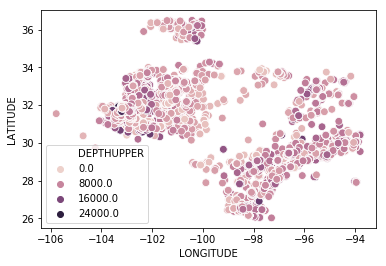

In [78]:

fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x=APIm.LONGITUDE, y=APIm.LATITUDE, hue=APIm.DEPTHUPPER, cmap='red',s=60)

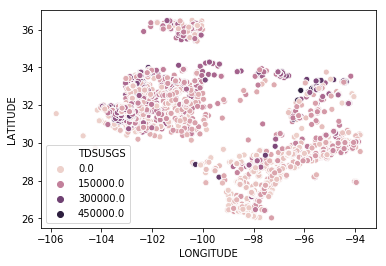

In [84]:
plt.figure()
sns.scatterplot(x=APIm.LONGITUDE, y=APIm.LATITUDE, hue=APIm.TDSUSGS, color='blue')

In [7]:
formations = []
for formation in df_drop['FORMATION']:
    if not formation in formations:
        formations.append(formation)
        
print(formations[:20])

['Fusselman', 'Cline Shale', 'Wolfwood (Wolfcamp/Woodford)', 'Spraberry', 'Dean', 'Wolfcamp Shale', 'Spraberry, Strawn, Fusselman', 'Otoka/Barnett Shale', 'Strawn, Atoka, Mississipain Lime, Spraberry', 'Strawn, Atoka, Spraberry', 'Multiple Reservoirs', 'Spraberry, Wolfcamp, and Pennsylvanian', 'Edwards', 'Frio', 'Hosston / Cotton Valley', 'Miocene', 'Vicksburg', 'Wilcox', 'Austin Chalk', 'Frio A']
